In [4]:
import h5py
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from functools import reduce
import matplotlib.pyplot as plt

import warnings
import sys
warnings.simplefilter('ignore')

Change the path to import classes!

In [6]:
sys.path.append('/Users/mikhail/projects/edu/skoltech/ml/project/RF-online/src/')

In [8]:
from online.mondrian_forest import MRF

In [4]:
def hdf5(path, data_key = "data", target_key = "target", flatten = True):
    with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get(data_key)[:]
        y_tr = train.get(target_key)[:]
        test = hf.get('test')
        X_te = test.get(data_key)[:]
        y_te = test.get(target_key)[:]
        if flatten:
            X_tr = X_tr.reshape(X_tr.shape[0], reduce(lambda a, b: a * b, X_tr.shape[1:]))
            X_te = X_te.reshape(X_te.shape[0], reduce(lambda a, b: a * b, X_te.shape[1:]))
    return X_tr, y_tr, X_te, y_te

In [5]:
X_train, y_train, X_test, y_test = hdf5('usps.h5')

In [6]:
from tqdm import tqdm_notebook
import math
from collections import Counter
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import time

In [8]:
X_train_size = X_train.shape[0]
y_train_size = y_train.shape[0]

thresholds = np.arange(0.1, 1.1, 0.1)

accuracy_list = []

time_list = []

for threshold in tqdm_notebook(thresholds):

    forest = []
    results = []
    predicted = []
    
    print("Threshold: ", threshold)

    tree = MRF(n_estimators=10)
    start = time.time()
    tree.fit(X_train[:int(X_train_size * threshold)], y_train[:int(y_train_size * threshold)])
    end = time.time()
    difference = end - start
    time_list.append(difference)
    result = tree.predict(X_test)
    acc = accuracy_score(y_test, result)
    print("Accuracy: ", acc)
    accuracy_list.append(acc)

Threshold:  0.1
Accuracy:  0.7907324364723468
Threshold:  0.2
Accuracy:  0.8261086198305929
Threshold:  0.30000000000000004
Accuracy:  0.8460388639760837
Threshold:  0.4
Accuracy:  0.8674638764324863
Threshold:  0.5
Accuracy:  0.8739412057797707
Threshold:  0.6
Accuracy:  0.8804185351270553
Threshold:  0.7000000000000001
Accuracy:  0.8888888888888888
Threshold:  0.8
Accuracy:  0.8893871449925261
Threshold:  0.9
Accuracy:  0.8993522670652716
Threshold:  1.0
Accuracy:  0.8958644743398106



In [9]:
accuracy_list

[0.7907324364723468,
 0.8261086198305929,
 0.8460388639760837,
 0.8674638764324863,
 0.8739412057797707,
 0.8804185351270553,
 0.8888888888888888,
 0.8893871449925261,
 0.8993522670652716,
 0.8958644743398106]

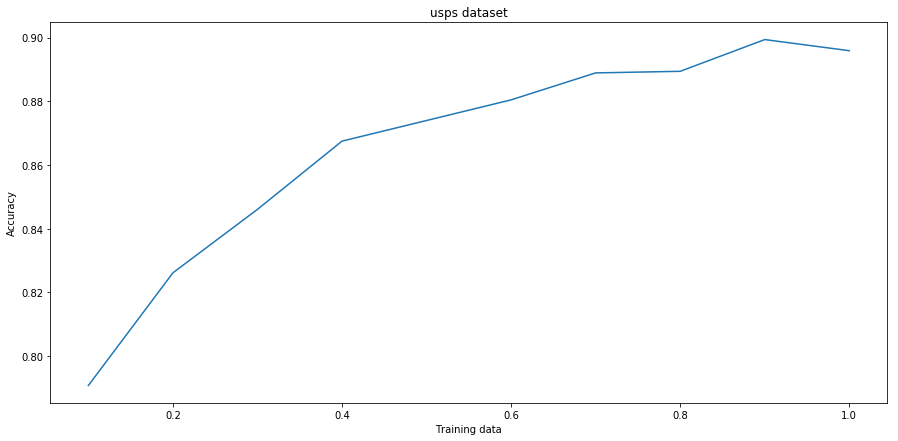

In [10]:
plt.figure(figsize=(15,7))
plt.title("usps dataset")
plt.xlabel("Training data")
plt.ylabel("Accuracy")
plt.plot(thresholds, accuracy_list)
plt.show()

In [23]:
def letter_dataset():
    df = pd.read_csv('letter-recognition.data', header=None)
    data = df.loc[:,1:]
    target = df[0].apply(lambda x: ord(x) - ord('A'))
    target = np.array(target)
    data = np.array(data)
    X_train, X_test, y_train, y_test = train_test_split(data, target)
    
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = letter_dataset()

In [25]:
X_train_size = X_train.shape[0]
y_train_size = y_train.shape[0]

thresholds = np.arange(0.2, 1.1, 0.1)

accuracy_list = []
time_list = []

for threshold in tqdm_notebook(thresholds):

    forest = []
    results = []
    predicted = []
    
    
    print("Threshold: ", threshold)

    tree = MRF(n_estimators=10)
    start = time.time()
    tree.fit(X_train[:int(X_train_size * threshold)], y_train[:int(y_train_size * threshold)])
    end = time.time()
        
    difference = end - start
    
    time_list.append(difference)

    result = tree.predict(X_test)
    acc = accuracy_score(y_test, result)
    print("Accuracy: ", acc)
    accuracy_list.append(acc)

Threshold:  0.2
Accuracy:  0.8426
Threshold:  0.30000000000000004
Accuracy:  0.8736
Threshold:  0.4000000000000001
Accuracy:  0.894
Threshold:  0.5000000000000001
Accuracy:  0.8992
Threshold:  0.6000000000000001
Accuracy:  0.9106
Threshold:  0.7000000000000002
Accuracy:  0.9202
Threshold:  0.8000000000000003
Accuracy:  0.9286
Threshold:  0.9000000000000001
Accuracy:  0.9318
Threshold:  1.0000000000000002
Accuracy:  0.9366


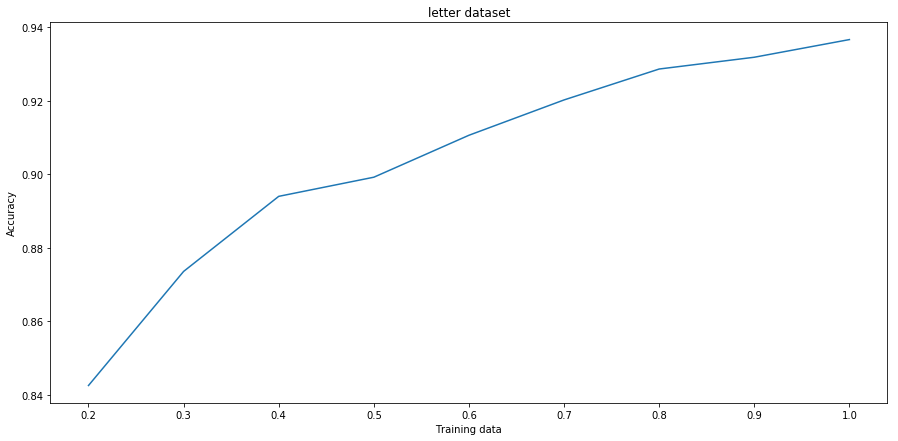

In [27]:
plt.figure(figsize=(15,7))
plt.title("letter dataset")
plt.xlabel("Training data")
plt.ylabel("Accuracy")
plt.plot(thresholds, accuracy_list)
plt.show()

In [17]:
cols = ['target', 'cap-shape', 'cap-surface', 'cap-color', 'odor', 'high', 'gill-attachment', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
        'spore-print-color', 'population', 'habitat'
       ]
mushroom_dataset = pd.read_csv('agaricus-lepiota.data.txt', sep=',', names=cols)
mushroom_dataset.head()

for col in cols:
    mushroom_dataset[col] = mushroom_dataset[col].astype('category').cat.codes
mushroom_dataset.head()

,target,cap-shape,cap-surface,cap-color,odor,high,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
X = mushroom_dataset.iloc[:, 1:].values
y = mushroom_dataset.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True)

In [20]:
X_train_size = X_train.shape[0]
y_train_size = y_train.shape[0]

thresholds = np.arange(0.2, 1.1, 0.1)

accuracy_list = []
time_list = []

for threshold in tqdm_notebook(thresholds):

    forest = []
    results = []
    predicted = []
    
    print("Threshold: ", threshold)

#     for i in tqdm_notebook(range(10)):
    tree = MRF(n_estimators=10)
    start = time.time()
    tree.fit(X_train[:int(X_train_size * threshold)], y_train[:int(y_train_size * threshold)])
    end = time.time()
    
    difference = end - start
    
    time_list.append(difference)
    
    result = tree.predict(X_test)
    acc = accuracy_score(y_test, result)
    print(acc)
    accuracy_list.append(acc)

Threshold:  0.2
0.9958982772764561
Threshold:  0.30000000000000004
0.867104183757178
Threshold:  0.4000000000000001
0.9991796554552912
Threshold:  0.5000000000000001
1.0
Threshold:  0.6000000000000001
0.938884331419196
Threshold:  0.7000000000000002
1.0
Threshold:  0.8000000000000003
1.0
Threshold:  0.9000000000000001
1.0
Threshold:  1.0000000000000002
1.0


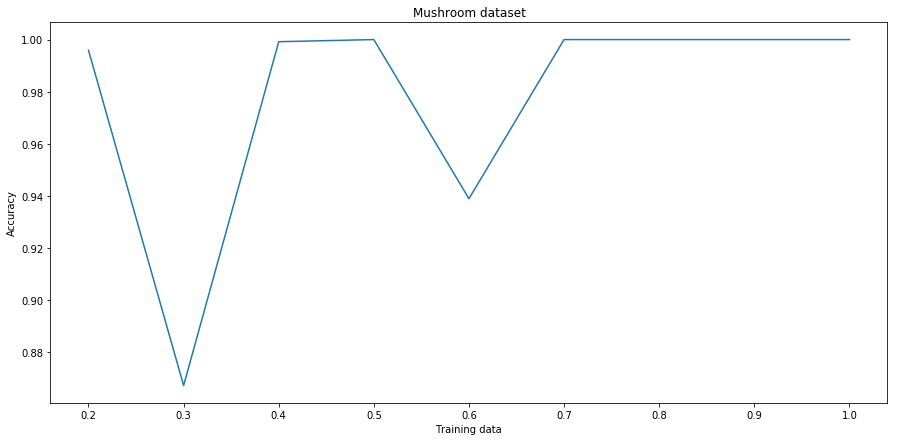

In [21]:
plt.figure(figsize=(15,7))
plt.title("Mushroom dataset")
plt.xlabel("Training data")
plt.ylabel("Accuracy")
plt.plot(thresholds, accuracy_list)
plt.show()